# Plots for LMR/PHYDA validation

**Everything for 800 - 1850 / 1850 - 1999 separately:**

- Plot 1: gmt comparison (no psm/psm light/full psm without debiasing)
- Plot 2: Multi-Model ensemble (sisal/iso/both), lmr
- Plot 3: Local correlation map: regrid LMR to Echam

- Plot 4: Global mean precipitation (LMR vs mathi, different models)

**Functions and coding skill:**
- anomaly
- filter

Correlation heatmap: 
- https://stackoverflow.com/questions/39409866/correlation-heatmap
- requires a dataframe (check 5_4_mme to see how I did it there)

**Required external data**:
- Berkeley Earth: Global mean temperature (starts at 1750, but I will use 1850:). Should include uncertainty also
- LMR and PHYDA
- regrid LMR to multi_model ensemble


In [20]:
import sys
sys.path.append('/home/mchoblet/paleoda')

import xarray as xr
import wrapper
import dataloader
import tqdm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  
from matplotlib.offsetbox import AnchoredText    
import utils

import copy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Berkeley Earth
BE_path='/home/mchoblet/validation_data/Land_and_Ocean_complete.txt'

In [5]:
years=np.genfromtxt(BE_path)[:,0]
values=np.genfromtxt(BE_path)[:,2]
uncert=np.genfromtxt(BE_path)[:,3]
times=xr.cftime_range('1850','2023',freq='M')[:-2]

In [6]:
da = xr.DataArray(
    data=values,
    dims=["time"],
    coords=dict(
        time=times,
    ),
)
BE_mean=da.groupby('time.year').mean('time')
da = xr.DataArray(
    data=uncert,
    dims=["time"],
    coords=dict(
        time=times,
    ),
)
BE_uncert=da.groupby('time.year').mean('time')

In [445]:
cutoff=1/30

In [625]:
model_data3=[]
for m,p in models_tsurf.items():
    if m!='GISS':
        data=dataloader.annual_mean(xr.open_dataset(p)['tsurf'],check_nan=True).sel(time=slice('0851','1849'))
        mean=utils.globalmean(data)
        data2=mean#quick_filt(mean,cutoff=cutoff)
        #plt.plot(data,label=m)
        model_data3.append(data2)

Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Only nans in year 1426-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1427-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1428-01-01 00:00:00 . Replaced values with previous year


In [626]:
#model-Data for average spectrum!

models_tsurf={'CCSM':'/home/mchoblet/paleoda/data/model_data/CCSM_tsurf_851_1850.nc',
'CESM':'/home/mchoblet/paleoda/data/model_data/CESM_tsurf_850_1850.nc',
'Echam':'/home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc',
'GISS':'/home/mchoblet/paleoda/data/model_data/GISS_tsurf_850_1849.nc',
'iHADCM3':'/home/mchoblet/paleoda/data/model_data/iHADCM3_tsurf_801_1952.nc'}

models_prec={'CCSM':'/home/mchoblet/paleoda/data/model_data/CCSM_prec_851_1850.nc',
'CESM':'/home/mchoblet/paleoda/data/model_data/CESM_prec_850_1850.nc',
'Echam':'/home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc',
'GISS':'/home/mchoblet/paleoda/data/model_data/GISS_prec_850_1849.nc',
'iHADCM3':'/home/mchoblet/paleoda/data/model_data/iHADCM3_prec_801_1952.nc'}

model_data2=[]
for m,p in models_tsurf.items():
    data=dataloader.annual_mean(xr.open_dataset(p)['tsurf'],check_nan=True).sel(time=slice('0851','1849'))
    mean=utils.globalmean(data).
    data2=mean#quick_filt(mean,cutoff=cutoff)
    #plt.plot(data,label=m)
    model_data2.append(data2)
    
#model_mean_temp_glb=np.median(model_data2,axis=0)
#model_std_temp_glb=np.std(model_data2,axis=0)
"""
plt.legend()
plt.show()

model_data2=[]
for m,p in models_prec.items():
    data0=dataloader.annual_mean(xr.open_dataset(p)['prec'],check_nan=True).sel(time=slice('0851','1849'))
    data=quick_filt(utils.globalmean(anomaly(data0,start=start_a,end=end_a)),cutoff=cutoff)
    plt.plot(data,label=m)
    model_data2.append(data)

plt.legend()
model_mean_prec_glb=np.median(model_data2,axis=0)
model_std_prec_glb=np.std(model_data2,axis=0)

time_models=data0.time
"""

Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Only nans in year 1426-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1427-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1428-01-01 00:00:00 . Replaced values with previous year


"\nplt.legend()\nplt.show()\n\nmodel_data2=[]\nfor m,p in models_prec.items():\n    data0=dataloader.annual_mean(xr.open_dataset(p)['prec'],check_nan=True).sel(time=slice('0851','1849'))\n    data=quick_filt(utils.globalmean(anomaly(data0,start=start_a,end=end_a)),cutoff=cutoff)\n    plt.plot(data,label=m)\n    model_data2.append(data)\n\nplt.legend()\nmodel_mean_prec_glb=np.median(model_data2,axis=0)\nmodel_std_prec_glb=np.std(model_data2,axis=0)\n\ntime_models=data0.time\n"

In [957]:
model_data2

[<xarray.DataArray 'gm_' (time: 999)>
 array([288.10813628, 288.118867  , 288.12825636, 287.87072975,
        287.85124131, 287.96383631, 287.85554132, 287.82731718,
        287.99216986, 288.07766078, 288.06739475, 288.2839119 ,
        288.11159528, 287.87822228, 287.92215788, 287.99062102,
        288.1047459 , 288.13575155, 287.98869992, 287.87426375,
        287.80984699, 287.88145723, 287.89661592, 287.99779424,
        288.05828606, 287.91210319, 287.97793914, 288.01403583,
        288.0165178 , 287.96602171, 288.0106593 , 287.93098946,
        287.835832  , 287.95431086, 287.94228063, 287.84809322,
        288.04516189, 288.0008781 , 287.88462098, 287.90724163,
        287.99806767, 288.13814795, 287.89382929, 288.03096267,
        288.06150792, 287.99123196, 287.93080742, 287.99932718,
        287.96878583, 288.01953205, 287.91407351, 287.72569861,
        287.86585609, 287.98353654, 288.09712236, 288.09225031,
        288.00801434, 287.92254795, 288.01100463, 288.00415704,
  

In [682]:
def anomaly(ds,start='1800',end='1850'):
    """
    start='1850'
    end='1900'
    """
    ds=ds-ds.sel(time=slice(start,end)).mean('time')
    return ds

def quick_filt(ts,cutoff=1/30):
    from scipy.signal import butter, lfilter, filtfilt

    def butter_lowpass(cutoff, fs, order=6, kf=1.2):
        # kf:  scaling factor for the lowpass frequency; 1 = Nyquist, 1.2 =
        #' 1.2xNyquist is a tradeoff between reducing variance loss and keeping
        #' aliasing small
        #fs is basic timestep (min_ts)
        #nyquist frequency
        nyq = 0.5 * fs 
        normal_cutoff = cutoff / nyq * kf
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def butter_lowpass_filter(data, cutoff, fs, order=6):
        #filtfilt does not introduce a time-lag in comparison to butterworth 
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = filtfilt(b, a, data)
        #y = lfilter(b, a, data)
        return y

    return butter_lowpass_filter(ts,cutoff,fs=1,order=4)


In [8]:
### LMR v2.1. and PHYDA

phyda_path='/home/mchoblet/validation_data/phyda.nc'
phyda=xr.open_dataset(phyda_path)
LMR_tsurf_m='/home/mchoblet/validation_data/air_MCruns_ensemble_mean_LMRv2.1.nc'
LMR_tsurf_s='/home/mchoblet/validation_data/air_MCruns_ensemble_spread_LMRv2.1.nc'
LMR_gmt='/home/mchoblet/validation_data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
lmr_gm=xr.open_dataset(LMR_gmt)
time_lmr=lmr_gm['time']
time_phyda=time_lmr[1:]
phyda['time']=time_phyda
phyda=phyda.sel(time=slice('0800','1999'))
lmr_gm=lmr_gm.sel(time=slice('0800','1999'))['gmt']

lmr_mean=lmr_gm.mean('MCrun').mean('members')
lmr_std=lmr_gm.std('members').mean('MCrun')

In [9]:
# regridding performed on Ravenclwa, because there is an incompatibility with the newest xarray version :/
lmr_re=xr.open_dataset('/home/mchoblet/validation_data/lmr_re.nc')['air']
phyda_re=xr.open_dataset('/home/mchoblet/validation_data/phyda_re.nc')
phyda_re=phyda_re[list(phyda_re.data_vars)[0]]

## GMT Comparison

In [1243]:
def comparison_plot(
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    mode='both', #sisal, iso
    models=['mme_nogiss','Echam','GISS','iCESM','isoGSM','iHadCM3'],
    cutoff=1/30,
    start_a='1850',
    end_a='1900',
    start='0800',
    end='2000',
    validation={'LMR':lmr_mean,'PHYDA':phyda['gmt_mn']},
    prior=None, #if using prior, change start_a and end_a to 851-1849
    title=None,
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    label='$\Delta$ T [K]',
    var='gm_tsurf',
    lw=2
    ):
    fig=plt.figure(figsize=(12,8))
    colors=np.concatenate([[(0,0,0)],sns.color_palette('colorblind',n_colors=(len(models)+len(list(validation.keys()))-2)),[(0,0,0)]])

    for i,m in enumerate(models):
        path=basepath+m+'_'+mode+'.nc'
        p=xr.open_dataset(path)[var]
        if cutoff is not None:
            ts=quick_filt(anomaly(p,start_a,end_a).values,cutoff=cutoff)
        else:
            ts=anomaly(p,start_a,end_a).values
        if m=='mme_nogiss':
            m='MME'
        plt.plot(ts,label=m,lw=2,color=colors[i])

    for j,(n,v) in enumerate(validation.items()):
        data=v.sel(time=slice(start,end))
        if cutoff is not None:
            ts=quick_filt(anomaly(data,start_a,end_a).values,cutoff=cutoff)
        else:
            ts=anomaly(data,start_a,end_a).values
        plt.plot(ts,label=n,lw=2,color=colors[i+j+1],ls=(0, (1, 1)))
        time=data.time
        #print(time.values)
        #plt.plot(data,label='Phyda',lw=lw)
        #print(model_time.values)
        #plt.fill_between(model_mean_temp-model_std_temp, model_mean_temp + model_std_temp,color='lightgrey',label='Priors')
        
    if prior is not None:
        if cutoff is not None:
            prior[1]=quick_filt((prior[1]-prior[1].mean()),cutoff=cutoff)
            prior[2]=quick_filt(prior[2],cutoff=cutoff)
        plt.fill_between(prior[0],prior[1]-prior[2], prior[1]+prior[2],color='lightgrey',label='Priors')
    
    plt.yticks(fontsize=20)
    plt.grid('On')
    plt.xticks(ticks=ticks,labels=labels,fontsize=20)
    plt.ylabel(label,fontsize=24)
    plt.xlabel('Year CE',fontsize=24)
    
    if legend is True:
        plt.legend(fontsize=18,bbox_to_anchor=(1.02, 1),frameon=True)
    if title is not None:
        plt.title(title,fontsize=30)

    return fig

In [783]:
models_tsurf={'CCSM':'/home/mchoblet/paleoda/data/model_data/CCSM_tsurf_851_1850.nc',
'CESM':'/home/mchoblet/paleoda/data/model_data/CESM_tsurf_850_1850.nc',
'Echam':'/home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc',
'GISS':'/home/mchoblet/paleoda/data/model_data/GISS_tsurf_850_1849.nc',
'iHADCM3':'/home/mchoblet/paleoda/data/model_data/iHADCM3_tsurf_801_1952.nc'}


model_data=[]
for m,p in models_tsurf.items():
    data=dataloader.annual_mean(xr.open_dataset(p)['tsurf'],check_nan=True).sel(time=slice('0851','1849'))
    model_time=data.time
    data=quick_filt(utils.globalmean(anomaly(data,start='0851',end='1849')),cutoff=cutoff)
    model_data.append(data)
    
model_mean_temp=np.median(model_data,axis=0)
model_std_temp=np.std(model_data,axis=0)


Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Only nans in year 1426-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1427-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1428-01-01 00:00:00 . Replaced values with previous year


In [1421]:
phyda['gmt_mn']

<xarray.DataArray 'gmt_mn' (time: 1200)>
array([14.797736, 14.802618, 14.89151 , ..., 15.481336, 15.592172, 15.44688 ])
Coordinates:
  * time     (time) object 0800-01-01 00:00:00 ... 1999-01-01 00:00:00
Attributes:
    long_name:  global mean 2 m temperature (reconstruction mean)
    units:      degC

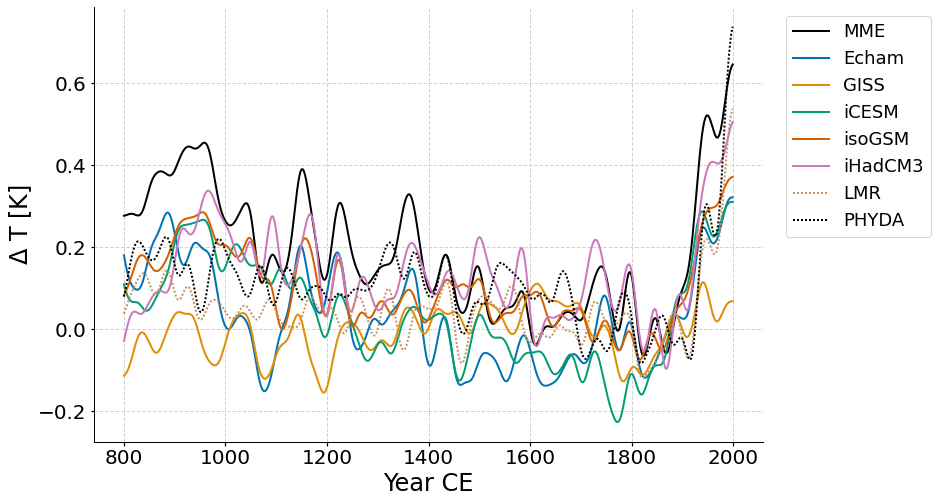

In [1422]:
gmt_fig=comparison_plot(validation={'LMR':lmr_mean,'PHYDA':phyda['gmt_mn']},cutoff=1/50)

In [1245]:
gmt_fig.savefig('/home/mchoblet/plots_thesis/6_1/gmt_all.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

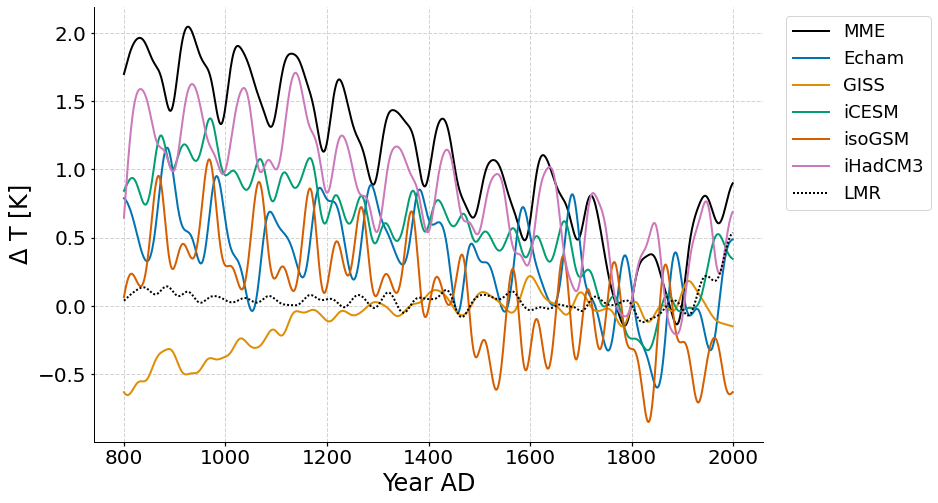

In [908]:
#plot without debiasing (it gets crazy!)
gmt_fig=comparison_plot(basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_2/',validation={'LMR':lmr_mean},cutoff=1/50)

In [1445]:
# add the prior!

model_data_vals=[]
for m,p in models_tsurf.items():
    data=dataloader.annual_mean(xr.open_dataset(p)['tsurf'],check_nan=True).sel(time=slice('0851','1849'))
    mean=utils.globalmean(data).values
    data2=mean-mean.mean()#quick_filt(mean,cutoff=cutoff)
    #plt.plot(data,label=m)
    model_data_vals.append(data2)
    
mean=np.mean(model_data_vals,axis=0)
std=np.std(model_data_vals,axis=0)

Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Only nans in year 1426-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1427-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1428-01-01 00:00:00 . Replaced values with previous year


In [1460]:
#including the priors
def comparison_plot2(
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    mode='both', #sisal, iso
    models=['mme_nogiss','Echam','GISS','iCESM','isoGSM','iHadCM3'],
    cutoff=1/30,
    start_a='1850',
    end_a='1900',
    start='0800',
    end='2000',
    validation={'LMR':lmr_mean,'PHYDA':phyda['gmt_mn']},
    prior=None, #if using prior, change start_a and end_a to 851-1849
    title=None,
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    label='$\Delta$ T [K]',
    var='gm_tsurf',
    lw=2
    ):
    fig=plt.figure(figsize=(12,8))
    colors=np.concatenate([[(0,0,0)],sns.color_palette('colorblind',n_colors=(len(models)+len(list(validation.keys()))-2)),[(0,0,0)]])

    for i,m in enumerate(models):
        path=basepath+m+'_'+mode+'.nc'
        p=xr.open_dataset(path)[var]
        if cutoff is not None:
            ts=quick_filt(anomaly(p,start_a,end_a).values,cutoff=cutoff)
        else:
            ts=anomaly(p,start_a,end_a).values
        if m=='mme_nogiss':
            m='MME'
        #plt.plot(p.time,ts,label=m,lw=2,color=colors[i])
        plt.plot(ts,label=m,lw=2,color=colors[i])

    for j,(n,v) in enumerate(validation.items()):
        data=v.sel(time=slice(start,end))
        if cutoff is not None:
            ts=quick_filt(anomaly(data,start_a,end_a).values,cutoff=cutoff)
        else:
            ts=anomaly(data,start_a,end_a).values
        #plt.plot(data.time,ts,label=n,lw=2,color=colors[i+j+1],ls=(0, (1, 1)))
        plt.plot(ts,label=n,lw=2,color=colors[i+j+1],ls=(0, (1, 1)))
        #time=data.time
        
    if prior is not None:
        if cutoff is not None:
            prior[1]=quick_filt((prior[1]),cutoff=cutoff)
            prior[2]=quick_filt(prior[2],cutoff=cutoff)
        #plt.fill_between(prior[0],prior[1]-prior[2], prior[1]+prior[2],color='lightgrey',label='Priors')
        plt.fill_between(np.arange(51,51+999),prior[1]-prior[2], prior[1]+prior[2],color='lightgrey',label='Models')
    
    plt.yticks(fontsize=20)
    plt.grid('On')
    #plt.xticks(ticks=ticks,labels=labels,fontsize=20)
    plt.ylabel(label,fontsize=24)
    plt.xlabel('Year CE',fontsize=24)
    #labels=np.arange(800,2200,200)
    labels=np.arange(600,2200,200)
    plt.xticks(fontsize=20)
    ax=plt.gca()
    ax.set_xticklabels(labels)
    
    #ran=xr.cftime_range('0800','2200',freq='200Y',calendar='noleap').values
    #ran=xr.cftime_range('0800','2200',freq='200Y').values
    #locs, labels = plt.xticks() 
    #ax.set_xticklabels(labels)
    #plt.xticks(locs,labels)
    
    #from matplotlib.dates import DateFormatter
    #import matplotlib.dates as md
    #date_form = DateFormatter("%Y")
    #ax=plt.gca()
    #ax.xaxis.set_major_formatter(date_form)
    #ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #ax.xaxis.set_major_locator(mdates.YearLocator(200))
    
    
    #step = 200
    #ax.xaxis.set_major_locator(md.YearLocator(step, month = 1, day = 1))
    #ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
    
    #print(p.time)
    
    if legend is True:
        plt.legend(fontsize=18,bbox_to_anchor=(1.02, 1),frameon=True)
    if title is not None:
        plt.title(title,fontsize=30)

    return fig

In [1446]:
pages2k_full=xr.open_dataset('/home/mchoblet/validation_data/pages2k_ngeo19_recons.nc').mean('ens').sel(year=slice(800,1999))
pages2k_full=pages2k_full.rename({'year':'time'})
pages2k_full['time']=phyda['time']

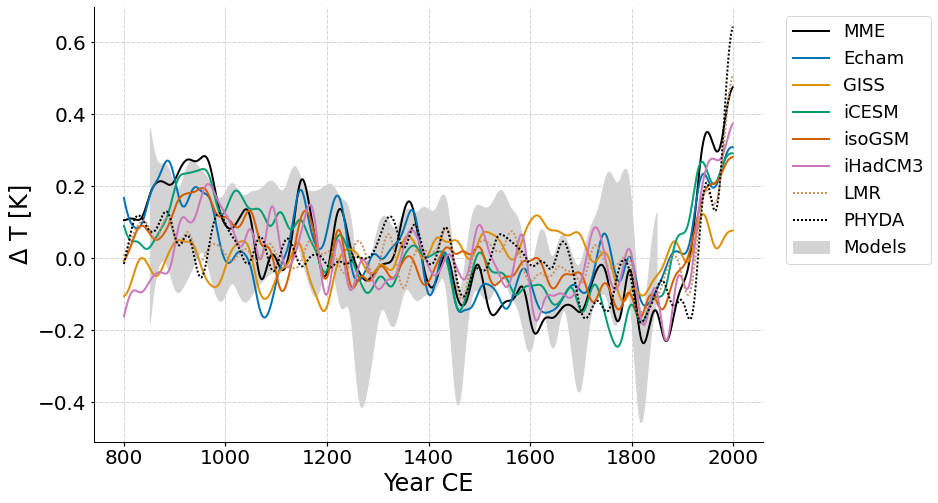

In [1461]:
gmt_fig=comparison_plot2(validation={'LMR':lmr_mean,'PHYDA':phyda['gmt_mn']},cutoff=1/50, start_a='0851',end_a='1849',prior=[data.time.values,mean,std])

In [1462]:
gmt_fig.savefig('/home/mchoblet/plots_thesis/6_1/gmt_all.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

In [ ]:
lmr=xr.open_dataset('/home/mchoblet/validation_data/air_MCruns_ensemble_mean_LMRv2.1.nc')['air'].mean('MCrun').mean('lon')

In [1228]:
import matplotlib as mpl
class MidpointNormalize(mpl.colors.Normalize):
    ## class from the mpl docs:
    # https://matplotlib.org/users/colormapnorms.html

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


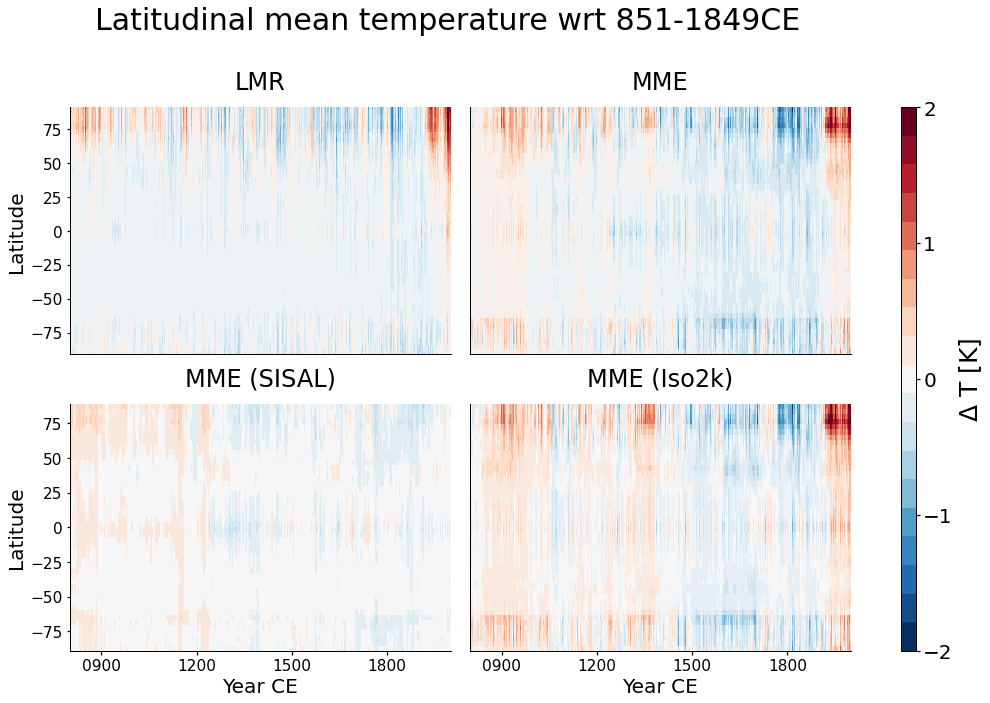

In [1251]:
figsize=(14,10)
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=figsize)
plt.suptitle('Latitudinal mean temperature wrt 851-1849CE',fontsize=30,y=1.02)

#Hovmöller plots of MME reconstruction 2 x 2 Pannel, reference period
start='0800'
end='2000'
vmax=2
levels=20

ax=axes[0,1]
data=xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/mme_nogiss_both.nc')#['lm_tsurf'].plot()
(data['lm_tsurf']-data['lm_tsurf'].sel(time=slice('0851','1849')).mean('time')).sel(time=slice(start,end)).T.plot(levels=levels,ax=ax,vmax=vmax,vmin=-vmax,cmap='RdBu_r',add_colorbar=False)
ax.set_title('MME',fontsize=24,y=1.05)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
#plt.ylabel('Latitude',fontsize=20)
#plt.xlabel('Year (AD)',fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

ax=axes[1,0]
data=xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/mme_nogiss_sisal.nc')#['lm_tsurf'].plot()
p=(data['lm_tsurf']-data['lm_tsurf'].sel(time=slice('0851','1849')).mean('time')).sel(time=slice(start,end)).T.plot(levels=levels,ax=ax,vmax=vmax,vmin=-vmax,cmap='RdBu_r',add_colorbar=False)
ax.set_title('MME (SISAL)',fontsize=24,y=1.05)
ax.set_xlabel('Year CE', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)

ax=axes[1,1]
data=xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/mme_nogiss_iso.nc')#['lm_tsurf'].plot()
(data['lm_tsurf']-data['lm_tsurf'].sel(time=slice('0851','1849')).mean('time')).sel(time=slice(start,end)).T.plot(levels=levels,ax=ax,vmax=vmax,vmin=-vmax,cmap='RdBu_r',add_colorbar=False)
ax.set_title('MME (Iso2k)',fontsize=24,y=1.05)
ax.axes.get_yaxis().set_visible(False)
ax.set_xlabel('Year CE', fontsize=20)


ax=axes[0,0]
(lmr-lmr.sel(time=slice('0851','1849')).mean('time')).sel(time=slice(start,end)).T.plot(levels=levels,ax=ax,vmax=vmax,vmin=-vmax,cmap='RdBu_r',add_colorbar=False)
ax.grid()
ax.axes.get_xaxis().set_visible(False)
ax.set_title('LMR',fontsize=24,y=1.05)
ax.set_ylabel('Latitude', fontsize=20)

p0=axes[1,1].get_position().get_points().flatten()
p1=axes[0,1].get_position().get_points().flatten()
#p2=axes.flatten()[-1].get_position().get_points().flatten()

from matplotlib import ticker

#colormap variable
#ax_cbar1 = fig.add_axes([p0[2]+0.05,p0[1]+(p0[3]-p0[1])/2,0.01,(p0[3]-p0[1])])
ax_cbar1 = fig.add_axes([p0[2]+0.05,p0[1],0.015,(p1[3]-p0[1])])
cb=fig.colorbar(p, cax=ax_cbar1, orientation='vertical',cmap=cmap,shrink=0.5)
cb.ax.tick_params(labelsize=20)
tick_locator = ticker.MaxNLocator(nbins=4)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('$\Delta$ T [K]',fontsize=25)
#fig.tight_layout()

plt.subplots_adjust(wspace=0.05)


In [1252]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/hovmoeller.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

# Multimodel ensemble (mme no giss, only iso,sisal,both comparison) and uncertainty
- less curves (mme, easier to compare)

In [10]:
phyda_mean=phyda['gmt_mn']
phyda_std=phyda['gmt_sg']

In [1452]:
def comparison_mme(
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    cutoff=1/30,
    start_a='1850',
    end_a='1900',
    start='0800',
    end='2000',
    validation={'LMR':[lmr_mean,lmr_std],'PHYDA':[phyda_mean,phyda_std]},
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    title='',
    ):
    figsize=(24,8)
    fig, axes = plt.subplots(ncols=2,nrows=1,figsize=figsize)
    
    #plot a) MME SISAL/ISO/BOTH/LMR/PHYDA
    sns.set_palette('colorblind',n_colors=(4+len(list(validation.keys()))))
    
    label_y=['$\Delta$ T [K]','Ensemble std [K]']
    
    varvar=['gm_tsurf','gm_tsurf_std']
    for i in range(2):
        ax=axes[i]
        m='mme_nogiss'
        for mode in ['both','sisal','iso']: 
            path=basepath+m+'_'+mode+'.nc'
            p=xr.open_dataset(path)[varvar[i]]

            if cutoff is not None:
                if i==0:
                    ts=quick_filt(anomaly(p,start_a,end_a).values,cutoff=cutoff)#*1.96
                else:
                    ts=quick_filt(p.values,cutoff=cutoff)#*1.96
                    #ts=p.values#*1.96
            else:
                if i==0:
                    ts=anomaly(p,start_a,end_a).values#*1.96
                else:
                    ts=p.values
                
            if mode=='both':
                lab='MME'+' (both)'
            elif mode=='sisal':
                lab='MME'+' (SISAL)'
            elif mode=='iso':
                lab='MME'+' (ISO2k)'
            
            ax.plot(ts,label=lab)
        
        #valication_dataset
        for n,v in validation.items():
            data=v[i].sel(time=slice(start,end))

            if cutoff is not None:
                if i==0:
                    ts=quick_filt(anomaly(data,start_a,end_a).values,cutoff=cutoff)
                else:
                    ts=quick_filt(data.values,cutoff=cutoff)#*1.96
                    #ts=data.values#*1.96
            else:
                if i==0:
                    ts=anomaly(data,start_a,end_a).values
                else:
                    ts=data.values#*1.96
            ax.plot(ts,label=n)
            #if i==1:
            #    ax.set_ylim()
        
        ax.tick_params(axis='y', labelsize=20)
        #ax.set_yticks('',fontsize=20)
        plt.grid('On')
        ax.set_xticks(ticks=ticks,labels=labels,fontsize=20)
        ax.set_ylabel(label_y[i],fontsize=24)
        ax.set_xlabel('Year CE',fontsize=24)
    
    if legend is True:
        #ax.legend(fontsize=18,bbox_to_anchor=(1.02, 1),frameon=True)#loc='upper left')
        ax.legend(fontsize=18,loc='lower left',frameon=True)#loc='upper left')
    
    #if title is not None:
    plt.suptitle(title,fontsize=30)
    plt.subplots_adjust(wspace=0.15)
    return fig

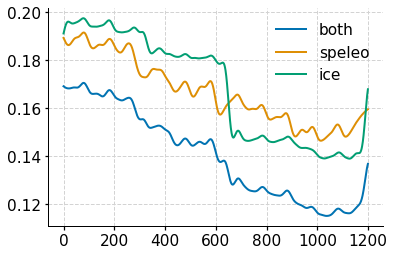

In [936]:
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/Echam_both.nc')['gm_tsurf_std'],cutoff=1/50),label='both')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/Echam_sisal.nc')['gm_tsurf_std'],cutoff=1/50),label='speleo')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/Echam_iso.nc')['gm_tsurf_std'],cutoff=1/50),label='ice')
plt.legend()


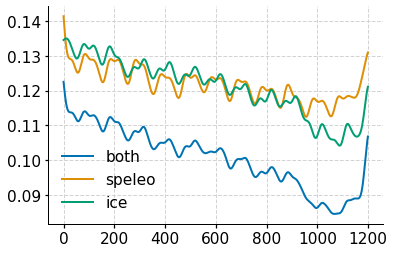

In [937]:
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/GISS_both.nc')['gm_tsurf_std'],cutoff=1/50),label='both')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/GISS_sisal.nc')['gm_tsurf_std'],cutoff=1/50),label='speleo')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/GISS_iso.nc')['gm_tsurf_std'],cutoff=1/50),label='ice')
plt.legend()


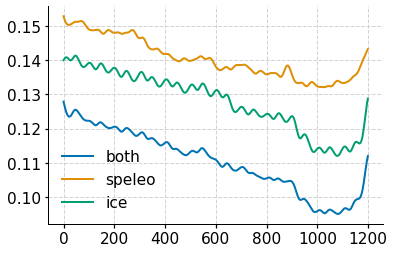

In [938]:
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iCESM_both.nc')['gm_tsurf_std'],cutoff=1/50),label='both')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iCESM_sisal.nc')['gm_tsurf_std'],cutoff=1/50),label='speleo')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iCESM_iso.nc')['gm_tsurf_std'],cutoff=1/50),label='ice')
plt.legend()


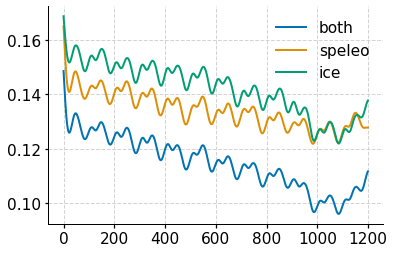

In [939]:
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/isoGSM_both.nc')['gm_tsurf_std'],cutoff=1/50),label='both')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/isoGSM_sisal.nc')['gm_tsurf_std'],cutoff=1/50),label='speleo')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/isoGSM_iso.nc')['gm_tsurf_std'],cutoff=1/50),label='ice')
plt.legend()


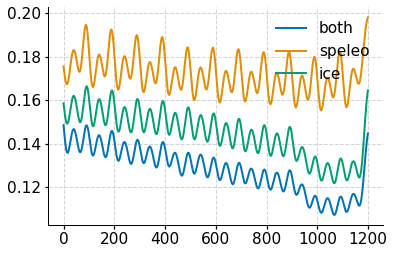

In [940]:
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iHadCM3_both.nc')['gm_tsurf_std'],cutoff=1/50),label='both')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iHadCM3_sisal.nc')['gm_tsurf_std'],cutoff=1/50),label='speleo')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iHadCM3_iso.nc')['gm_tsurf_std'],cutoff=1/50),label='ice')
plt.legend()


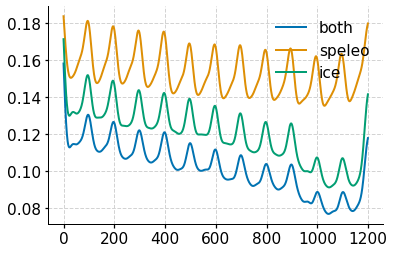

In [945]:
"""
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iHadCM3_both.nc')['gm_tsurf'],cutoff=1/50),label='both')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iHadCM3_sisal.nc')['gm_tsurf'],cutoff=1/50),label='speleo')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/iHadCM3_iso.nc')['gm_tsurf'],cutoff=1/50),label='ice')
plt.legend()
"""
plt.legend()
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_2/iHadCM3_both.nc')['gm_tsurf_std'],cutoff=1/50),label='both')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_2/iHadCM3_sisal.nc')['gm_tsurf_std'],cutoff=1/50),label='speleo')
plt.plot(quick_filt(xr.open_dataset('/home/mchoblet/paleoda/results/experiments/thesis_6_1_2/iHadCM3_iso.nc')['gm_tsurf_std'],cutoff=1/50),label='ice')
plt.legend()



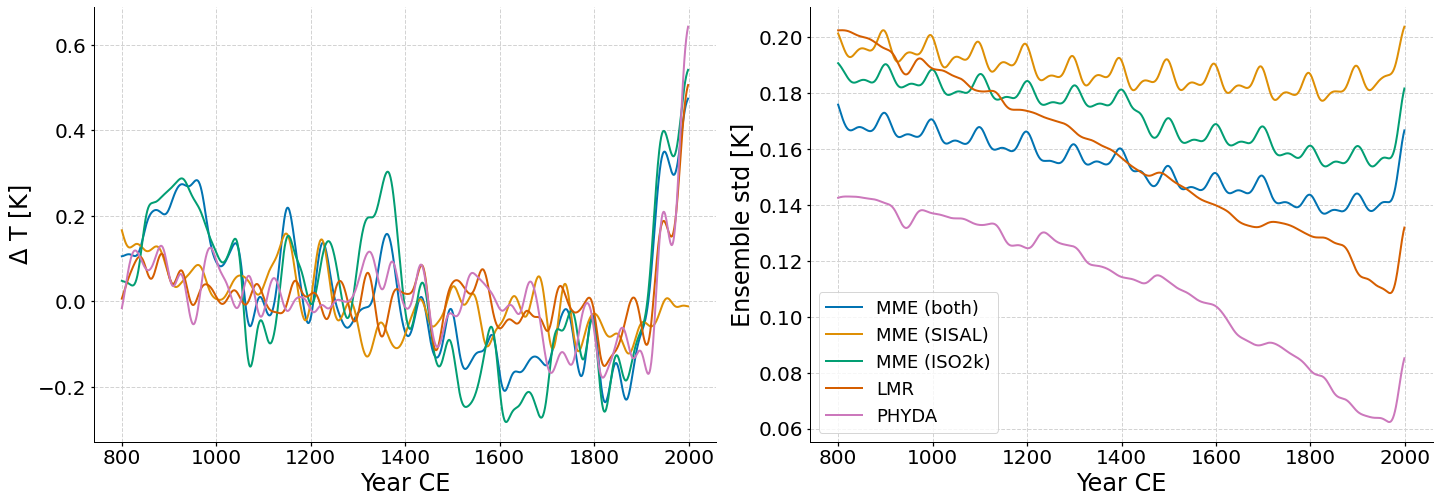

In [1453]:
comp=comparison_mme(
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    cutoff=1/50,
    #cutoff=None,
    #start_a='1850',
    #end_a='1900',
    start_a='0851',
    end_a='1849',
    validation={'LMR':[lmr_mean,lmr_std],'PHYDA':[phyda_mean,phyda_std]},
    #validation={'LMR':[lmr_mean,lmr_std]},
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    title='',
    )

In [1454]:
comp.savefig('/home/mchoblet/plots_thesis/6_1/gmt_comp.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

# Field comparison (Mathi vs LMR vs PHDA):
- Correlation maps for 800-1850 and 1850-1999

In [70]:
import xskillscore as xss
import scipy

In [613]:
def field_r(fields,start,end,cutoff=1/30,start_a='1850',end_a='1900',title=None,pval=False,detrend=False):
    """
    Compute correlation of fields
    """
    figsize=(12,8)
    cmap='RdBu_r'
    fig, axes = plt.subplots(ncols=1,nrows=1,figsize=figsize,subplot_kw={'projection':ccrs.PlateCarree()})
    ax=axes

    ax.axes.xaxis.set_visible(True)
    ax.axes.yaxis.set_visible(True)
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.add_feature(cfeature.COASTLINE)
    ax.axes.gridlines(color='black',alpha=0.5,linestyle='--')
    
    #prepare fields(anomaly just to be sure)
    field_list=[]
    for n,f in fields.items():
        #just for security
        f=f.sel(time=slice(start,end))
        if detrend==True:
            f_det=scipy.signal.detrend(f,axis=0)
            f.data=f_det
        
        f2=anomaly(f,start=start_a,end=end_a)
        
        if cutoff is not None:
            f3=quick_filt(f2,cutoff=cutoff)
            f2.data=f3
        field_list.append(f2)
            
    corr=xss.pearson_r(field_list[0],field_list[1],dim='time')
    pval_v=xss.pearson_r_p_value(field_list[0],field_list[1],dim='time')
    cbar_kwargs = {'orientation':'vertical', 'shrink':0.62, 'aspect':20,'label':'Correlation'}
    p=corr.plot(ax=axes,vmin=-1,vmax=1,add_colorbar=True,cmap=cmap,cbar_kwargs=cbar_kwargs)
     # Adjust as appropriate.
    
    """
    font_size = 14
    cb=plt.colorbar(p)
    cb.ax.tick_params(labelsize=font_size)
    p0=axes.flatten()[-4].get_position().get_points().flatten()
    p2=axes.flatten()[-1].get_position().get_points().flatten()
    
    from matplotlib import ticker

    #colormap variable
    ax_cbar1 = fig.add_axes([p0[0], p0[1]-0.05, (p2[2]-p0[0]), 0.02])
    cb=fig.colorbar(plot, cax=ax_cbar1, orientation='horizontal',cmap=cmap)
    cb.ax.tick_params(labelsize=20)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    cb.set_label(label,fontsize=30)
    """
    
    if pval==True:
        pval_v.plot.contourf(levels=[0.05,1],colors='none',hatches=[None,'..'],add_colorbar=False, extend='both',ax=ax)
    if title is not None:
        plt.title(title,fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    return fig
    

"\nif pval==True:\n    pval_v.plot.contourf(levels=[0.05,1],colors='none',hatches=[None,'..'],add_colorbar=False, extend='both',ax=ax)\nif title is not None:\n    plt.title(title,fontsize=20)\nplt.xlabel('')\nplt.ylabel('')\n"

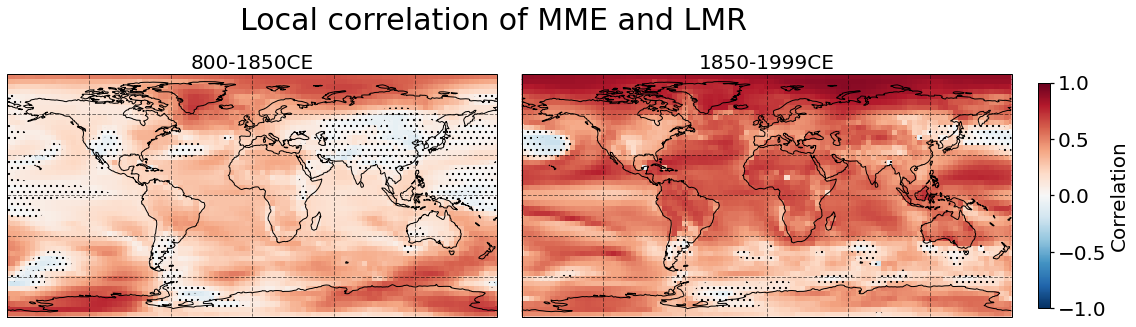

In [1255]:
fields=fields
start=start
end=end
cutoff=None
start_a='1850'
end_a='1900'
title=None
pval=False
detrend=False#True #False

"""
Compute correlation of fields
"""
figsize=(18,8)
cmap='RdBu_r'
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=figsize,subplot_kw={'projection':ccrs.PlateCarree()})
plt.suptitle('Local correlation of MME and LMR',fontsize=30,y=0.83)
titles=['800-1850CE','1850-1999CE']
for i in range(2):
    
    if i==0:
        start='0800'
        end='1850'
        cutoff=None
    else:
        start='1850'
        end='1999'
    
    ax=axes[i]
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axes.xaxis.set_ticks([])
    #ax.axes.yaxis.set_ticks([])
    ax.add_feature(cfeature.COASTLINE)
    ax.axes.gridlines(color='black',alpha=0.5,linestyle='--')

    #prepare fields(anomaly just to be sure)
    field_list=[]
    for n,f in fields.items():
        #just for security
        f=f.sel(time=slice(start,end))
        if detrend==True:
            f_det=scipy.signal.detrend(f,axis=0)
            f.data=f_det

        f2=anomaly(f,start=start_a,end=end_a)

        if cutoff is not None:
            f3=quick_filt(f2,cutoff=cutoff)
            f2.data=f3
        field_list.append(f2)

    corr=xss.pearson_r(field_list[0],field_list[1],dim='time')
    pval_v=xss.pearson_r_p_value(field_list[0],field_list[1],dim='time')
    #cbar_kwargs = {'orientation':'vertical', 'shrink':0.62, 'aspect':20,'label':'Correlation'}
    p=corr.plot(ax=ax,vmin=-1,vmax=1,add_colorbar=False,cmap=cmap)
    pval_v.plot.contourf(levels=[0.05,1],colors='none',hatches=[None,'..'],add_colorbar=False, extend='both',ax=ax)
    ax.set_title(titles[i],fontsize=20)
    
 # Adjust as appropriate.


#font_size = 14
#cb=plt.colorbar(p)
#cb.ax.tick_params(labelsize=font_size)
p0=axes[-1].get_position().get_points().flatten()
#p2=axes.flatten()[-1].get_position().get_points().flatten()

from matplotlib import ticker

#colormap variable
ax_cbar1 = fig.add_axes([p0[2]+0.02, p0[1], 0.01, p0[3]-p0[1]])
cb=fig.colorbar(p, cax=ax_cbar1, orientation='vertical',cmap=cmap)
cb.ax.tick_params(labelsize=20)
tick_locator = ticker.MaxNLocator(nbins=4)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Correlation',fontsize=20)
#fig.tight_layout()

plt.subplots_adjust(wspace=0.05)

"""
if pval==True:
    pval_v.plot.contourf(levels=[0.05,1],colors='none',hatches=[None,'..'],add_colorbar=False, extend='both',ax=ax)
if title is not None:
    plt.title(title,fontsize=20)
plt.xlabel('')
plt.ylabel('')
"""

In [1256]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/field_corr.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

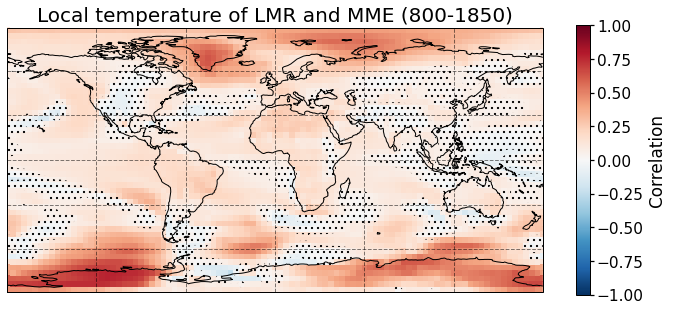

In [610]:
field_corr0_det=field_r(fields,start='0800',end='1850',cutoff=None,start_a='1850',end_a='1900',pval=True,detrend=True,title='Local temperature of LMR and MME (800-1850)')

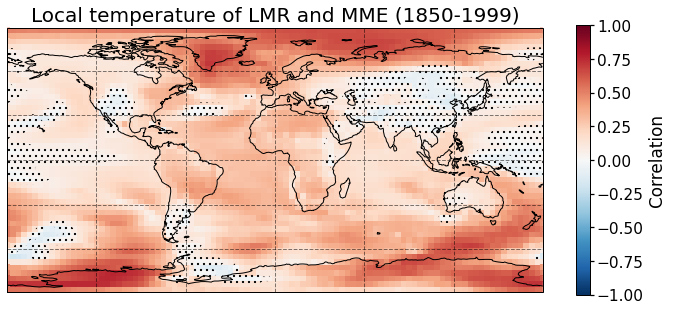

In [738]:
field_corr0=field_r(fields,start='0800',end='1850',cutoff=None,start_a='1850',end_a='1900',pval=True,detrend=False,title='Local temperature of LMR and MME (1850-1999)')

In [739]:
field_corr0.savefig('/home/mchoblet/plots_thesis/6_1/field_corr.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

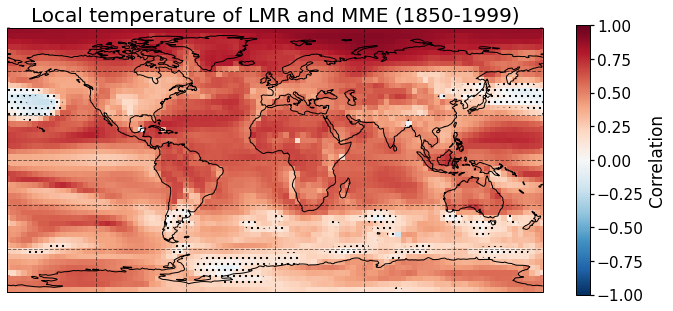

In [687]:
field_corr1=field_r(fields,start='1850',end='1999',cutoff=None,start_a='1850',end_a='1900',pval=True,title='Local temperature of LMR and MME (1850-1999)')

In [688]:
field_corr1.savefig('/home/mchoblet/plots_thesis/6_1/field_corr_warming.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

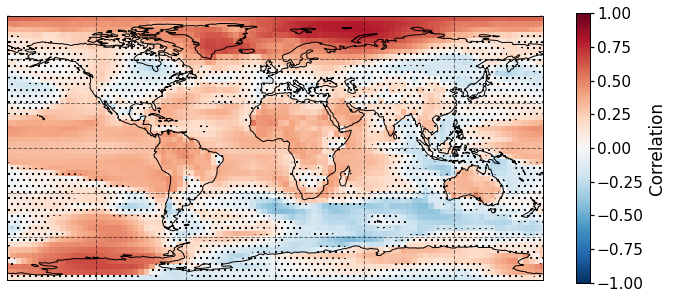

In [587]:
field_corr1_det=field_r(fields,start='1850',end='1999',cutoff=None,start_a='1850',end_a='1900',pval=True,detrend=True)

# Variability plots (Exclude global warming, hence 800-1850, for gmt)

- multitaper spectrum until 200 years
- all models, including mme, + lmr (phyda sieht wahrscheinlich ganz genauso aus)
- also add one climate model gmt to show that they don't have any variability


In [154]:
import pyleoclim as pyleo

In [155]:
CESM_mean=utils.globalmean(xr.open_dataset('/home/mchoblet/paleoda/data/model_data/CESM_tsurf_850_1850.nc')['tsurf'])

In [921]:
#use pyleoclim package, that makes it easy
def var_spec(
    models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss'],
    labels_m=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme'],
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    cutoff=1/30,
    start='0800',
    end='1850',
    validation={'LMR':lmr_mean,'PHYDA':phyda_mean},
    title=None,
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    mode='both',
    method='mtm',
    modeldata=None,
    standardize=True,
    ):
    sns.set_palette('colorblind',10)
    
    fig,axes=plt.subplots(1,1,figsize=(10,6))

    #spectrum
    for i,m in enumerate(models):
        path=basepath+m+'_'+mode+'.nc'
        p=xr.open_dataset(path)['gm_tsurf'].sel(time=slice(start,end))
        #exchange time such that it can be read by 
        p['time']=np.arange(int(start),int(end)+1,1)
        #create py series # is label needed?
        py_ser=pyleo.Series(value=p.values,time=p.time.values,time_name='time',time_unit='year',label='other')
        py_ser.spectral(method=method,settings={'standardize':standardize}).plot(ax=axes,label=labels_m[i],)
    
    #validation data spectrum
    for i,v in validation.items():
        try:
            v=v.sel(time=slice(start,end))
        except: #pages2k has already been sliced
            v=v
            #import pdb
            #pdb.set_trace()
        time=np.arange(int(start),int(end)+1,1)
        py_ser=pyleo.Series(value=v.values,time=np.arange(len(v)),time_name='time',time_unit='year',label='other')
        py_ser.spectral(method=method,settings={'standardize':standardize}).plot(ax=axes,label=i)
        
        #lr04_s.standardize().interp().spectral(method=method,settings={'scaling':'spectrum'}).plot(ax=axes,label=v)
        #without standardizing
        #lr04_s.spectral(method=method,settings={'standardize':False,'NW':4}).plot(ax=axes,label=v)
        
        #psd=pyleo.utils.spectral.welch(p2k_m[v].values[start:],lr04_s.time,scaling='density')
        #axes.plot(psd['freq'],psd['psd'],label=v)
    
    #overlay mean spectrum
    
    if modeldata is not None:
        spec=[]
        labels=[]
        for p in modeldata:
            py_ser=pyleo.Series(value=p,time=np.arange(len(p)),time_name='time',time_unit='year',label='other').detrend(method='linear')
            model_spec=py_ser.spectral(method=method,settings={'standardize':standardize})#.plot(ax=axes,label='bu')
            spec.append(model_spec)
        #import pdb
        #pdb.set_trace()    
        
        psd=pyleo.core.psds.MultiplePSD(spec).plot_envelope(ax=axes,plot_legend=False,shade_alpha=0.3,curve_clr='#d9544d',members_plot_num=0,curve_lw=0,shade_label='Priors',lgd_kwargs={'label':'Priors'})
        
        #psd=pyleo.core.psds.MultiplePSD(spec).plot_envelope(ax=axes,plot_legend=False)
        #import pdb
        #pdb.set_trace()
        #psd.plot_envelope()
        #import pdb
        #pdb.set_trace()
        #axes.plot(spec,label=i)
    
    axes.set_xlim(200,2)
    handles, labels = axes.get_legend_handles_labels()
    del handles[-2]
    del labels[-2]
    
    axes.legend(handles,labels,bbox_to_anchor=(1.15, 1),fontsize=15,title_fontsize=20,frameon=True)
    #import pdb
    #pdb.set_trace()
    
    #handles, labels = axes.get_legend_handles_labels()
    
    #axes.get_legend().get_title().set_fontsize('20')
    #string='PSD ('+method+') of GMT (800-1850 AD, not standardised)'
    if title is not None:
        plt.title(title,fontsize=25)

    return fig
    

In [1396]:
p=corr.plot(ax=axes,vmin=-1,vmax=1,add_colorbar=True,cmap=cmap,cbar_kwargs=cbar_kwargs)

NameError: name 'cbar_kwargs' is not defined

In [14]:
pages2k=xr.open_dataset('/home/mchoblet/validation_data/pages2k_ngeo19_recons.nc').mean('ens').sel(year=slice(800,1850))

In [661]:
pages2k_unc=xr.open_dataset('/home/mchoblet/validation_data/pages2k_ngeo19_recons.nc').std('ens').sel(year=slice(800,1850))

In [15]:
model='iCESM'#'Echam'#'iHadCM3' #'Echam','GISS','isoGSM','iCESM'
papath='CESM_tsurf_850_1850.nc'

#iHADCM3_tsurf_801_1952.nc,GISS_tsurf_850_1849.nc,CESM_tsurf_850_1850.nc,CCSM_tsurf_851_1850.nc

original=xr.open_dataset(('/home/mchoblet/paleoda/data/model_data/'+papath))['tsurf']
original_ts=utils.globalmean(dataloader.annual_mean(original,check_nan=True).sel(time=slice('0850','1849')))

Checking prior for nans


In [21]:
import pyleoclim as pyleo
from matplotlib import ticker
import matplotlib
import scipy

In [540]:
#validation={'LMR':lmr_mean,'PHYDA':phyda_mean,'CPS':pages2k['CPS'],'PAI':pages2k['PAI'],'iCESM':original_ts}
#validation={'LMR':lmr_mean,'iCESM':original_ts}
validation={'LMR':lmr_mean}

In [640]:
len(model_data3)

4

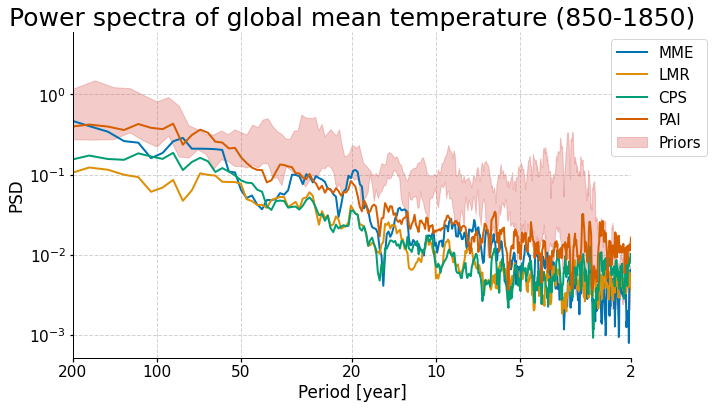

In [922]:
#nicht standartisierter plot )1=
varbility=var_spec(
    models=['mme_nogiss',],
    labels_m=['MME'],
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    cutoff=1/30,
    start='0800',
    end='1850',
    #validation={'LMR':lmr_mean,'PHYDA':phyda_mean},
    validation={'LMR':lmr_mean,'CPS':pages2k['CPS'],'PAI':pages2k['PAI'],},
    #validation=validation,
    #title=None,
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    mode='both',
    method='mtm',
    modeldata=model_data2,
    standardize=False,
    title='Power spectra of global mean temperature (850-1850)'
    )

In [1457]:
#use pyleoclim package, that makes it easy
def var_spec2(
    models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss'],
    labels_m=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme'],
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    cutoff=1/30,
    start='0800',
    end='1850',
    validation={'LMR':lmr_mean,'PHYDA':phyda_mean},
    title=None,
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    mode='both',
    method='mtm',
    modeldata=None,
    standardize=True,
    ):
    sns.set_palette('colorblind',6)
    
    fig,axes=plt.subplots(1,1,figsize=(10,6))

    #spectrum
    for i,m in enumerate(models):
        path=basepath+m+'.nc'
        p=xr.open_dataset(path)['gm_tsurf'].sel(time=slice(start,end))
        #exchange time such that it can be read by 
        p['time']=np.arange(int(start),int(end)+1,1)
        #create py series # is label needed?
        py_ser=pyleo.Series(value=p.values,time=p.time.values,time_name='time',time_unit='year',label='other')
        py_ser.spectral(method=method,settings={'standardize':standardize}).plot(ax=axes,label=labels_m[i],)
    
    #validation data spectrum
    for i,v in validation.items():
        try:
            v=v.sel(time=slice(start,end))
        except: #pages2k has already been sliced
            v=v.sel(year=slice(800,1850))
            #import pdb
            #pdb.set_trace()
        time=np.arange(int(start),int(end)+1,1)
        py_ser=pyleo.Series(value=v.values,time=np.arange(len(v)),time_name='time',time_unit='year',label='other')
        py_ser.spectral(method=method,settings={'standardize':standardize}).plot(ax=axes,label=i)
        
        #lr04_s.standardize().interp().spectral(method=method,settings={'scaling':'spectrum'}).plot(ax=axes,label=v)
        #without standardizing
        #lr04_s.spectral(method=method,settings={'standardize':False,'NW':4}).plot(ax=axes,label=v)
        
        #psd=pyleo.utils.spectral.welch(p2k_m[v].values[start:],lr04_s.time,scaling='density')
        #axes.plot(psd['freq'],psd['psd'],label=v)
    
    #overlay mean spectrum
    
    if modeldata is not None:
        spec=[]
        labels=[]
        for p in modeldata:
            py_ser=pyleo.Series(value=p,time=np.arange(len(p)),time_name='time',time_unit='years',label='other').detrend(method='linear')
            model_spec=py_ser.spectral(method=method,settings={'standardize':standardize})#.plot(ax=axes,label='bu')
            spec.append(model_spec)
        #import pdb
        #pdb.set_trace()    
        
        psd=pyleo.core.psds.MultiplePSD(spec).plot_envelope(ax=axes,plot_legend=False,shade_alpha=0.3,curve_clr='#d9544d',members_plot_num=0,curve_lw=0,shade_label='Models',lgd_kwargs={'label':'Priors'})
        
        #psd=pyleo.core.psds.MultiplePSD(spec).plot_envelope(ax=axes,plot_legend=False)
        #import pdb
        #pdb.set_trace()
        #psd.plot_envelope()
        #import pdb
        #pdb.set_trace()
        #axes.plot(spec,label=i)
    
    axes.set_xlim(200,2)
    handles, labels = axes.get_legend_handles_labels()
    del handles[-2]
    del labels[-2]
    
    #axes.legend(handles,labels,bbox_to_anchor=(1.05, 1),fontsize=15,title_fontsize=20,frameon=True)
    axes.legend(handles,labels,loc='lower left',fontsize=15,title_fontsize=20,frameon=True)
    #import pdb
    #pdb.set_trace()
    
    #handles, labels = axes.get_legend_handles_labels()
    
    #axes.get_legend().get_title().set_fontsize('20')
    #string='PSD ('+method+') of GMT (800-1850 AD, not standardised)'
    if title is not None:
        plt.title(title,fontsize=25)

    return fig
    

In [1258]:
lmr_mean

<xarray.DataArray 'gmt' (time: 1200)>
array([-0.14820129, -0.1399461 , -0.07921956, ...,  0.35413757,
        0.5512059 ,  0.35492706], dtype=float32)
Coordinates:
  * time     (time) object 0800-01-01 00:00:00 ... 1999-01-01 00:00:00

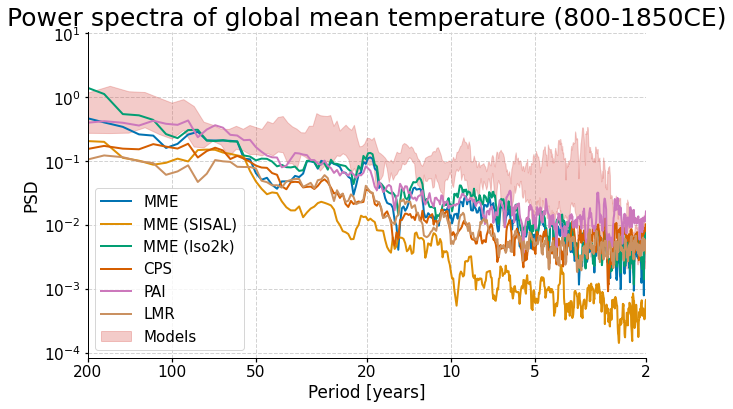

In [1458]:
# Only use
varbility=var_spec2(
    models=['mme_nogiss_both','mme_nogiss_sisal','mme_nogiss_iso'],
    labels_m=['MME', 'MME (SISAL)', 'MME (Iso2k)'],
    basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/',
    cutoff=1/30,
    start='0800',
    end='1850',
    #validation={'LMR':lmr_mean,'PHYDA':phyda_mean},
    validation={
    #'BHM':pages2k['BHM'],
    'CPS':pages2k['CPS'],
    #'OIE':pages2k['OIE'],
    'PAI':pages2k['PAI'],
    #'PCR':pages2k['PCR'],
    #'M08':pages2k['M08'],
    'LMR':lmr_mean,
    #'PHYDA':phyda_mean,
                },
    #validation=validation,
    #title=None,
    ticks=np.arange(0,1400,200),
    labels=list(map(str,np.arange(800,2200,200))),
    legend=True,
    mode='both',
    method='mtm',
    modeldata=model_data2,
    standardize=False,
    title='Power spectra of global mean temperature (800-1850CE)'
    )

In [1459]:
varbility.savefig('/home/mchoblet/plots_thesis/6_1/variability.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

# Global mean precipitation
- comparison plot with gm_prec as variable and changed label

In [912]:
lmr_prec='/home/mchoblet/validation_data/prate_MCruns_ensemble_mean_LMRv2.1.nc'
lmr_prec=utils.globalmean(xr.open_dataset(lmr_prec).mean('MCrun')['prate'])

lmr_prec=lmr_prec*24*60*60*30

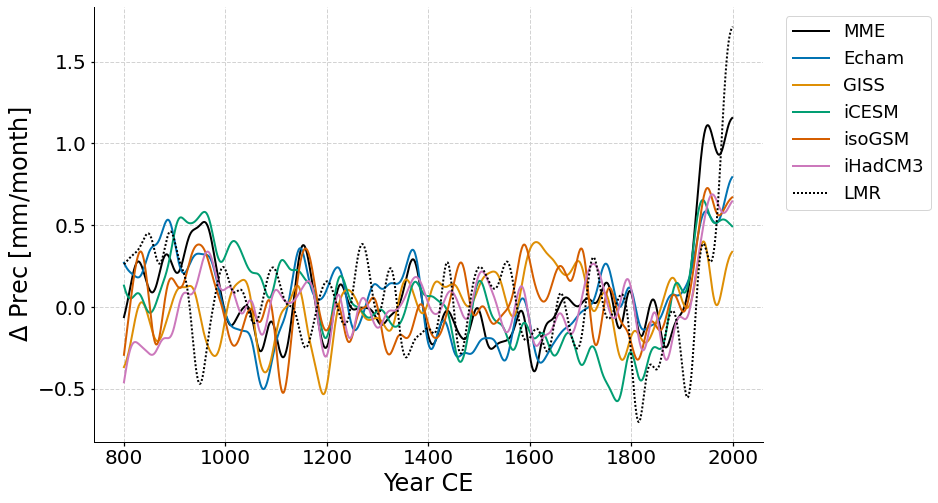

In [1273]:
prec_plot=comparison_plot2(
    label='$\Delta$ Prec [mm/month]',
    validation={'LMR':lmr_prec},
    cutoff=1/50,
    start_a='0851',end_a='1849',
    prior=[data.time.values,mean,std],
    var='gm_prec')

In [1355]:
# add the prior!

model_data_vals_prec=[]
for m,p in models_prec.items():
    data=dataloader.annual_mean(xr.open_dataset(p)['prec'],check_nan=True).sel(time=slice('0851','1849'))
    mean=utils.globalmean(data).values
    data2=mean-mean.mean()#quick_filt(mean,cutoff=cutoff)
    #plt.plot(data,label=m)
    model_data_vals_prec.append(data2)
    
mean_prec=np.mean(model_data_vals_prec,axis=0)
std_prec=np.std(model_data_vals_prec,axis=0)

Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Checking prior for nans
Only nans in year 1426-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1427-01-01 00:00:00 . Replaced values with previous year
Only nans in year 1428-01-01 00:00:00 . Replaced values with previous year


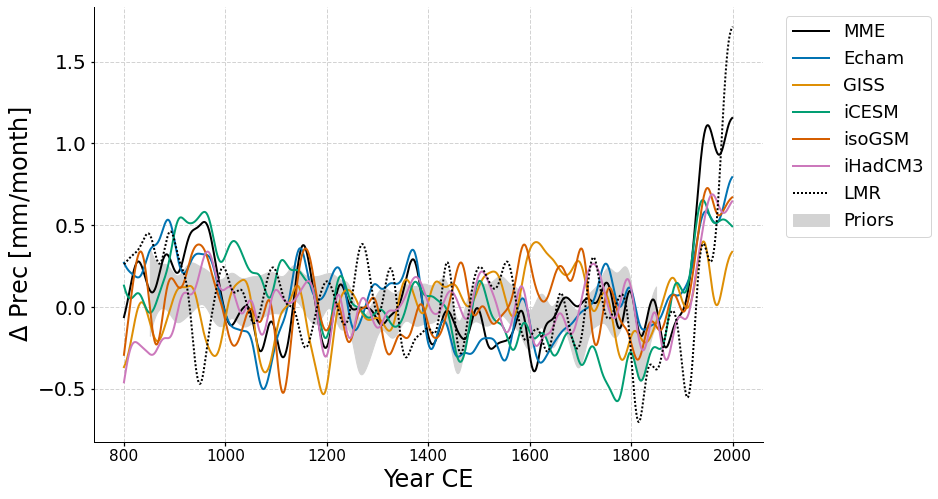

In [1274]:
prec_plot=comparison_plot2(
    label='$\Delta$ Prec [mm/month]',
    validation={'LMR':lmr_prec},
    cutoff=1/50,
    start_a='0851',end_a='1849',
    prior=[data.time.values,mean,std],
    var='gm_prec')

In [ ]:
gmt_fig=comparison_plot2(validation={'LMR':lmr_mean,'PHYDA':phyda['gmt_mn']},cutoff=1/50, start_a='0851',end_a='1849',prior=[data.time.values,mean,std])

In [1275]:
prec_plot.savefig('/home/mchoblet/plots_thesis/6_1/gm_prec.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

In [795]:
lmr_prec='/home/mchoblet/validation_data/prate_MCruns_ensemble_mean_LMRv2.1.nc'
lmr_prec=xr.open_dataset(lmr_prec).mean('MCrun')['prate']

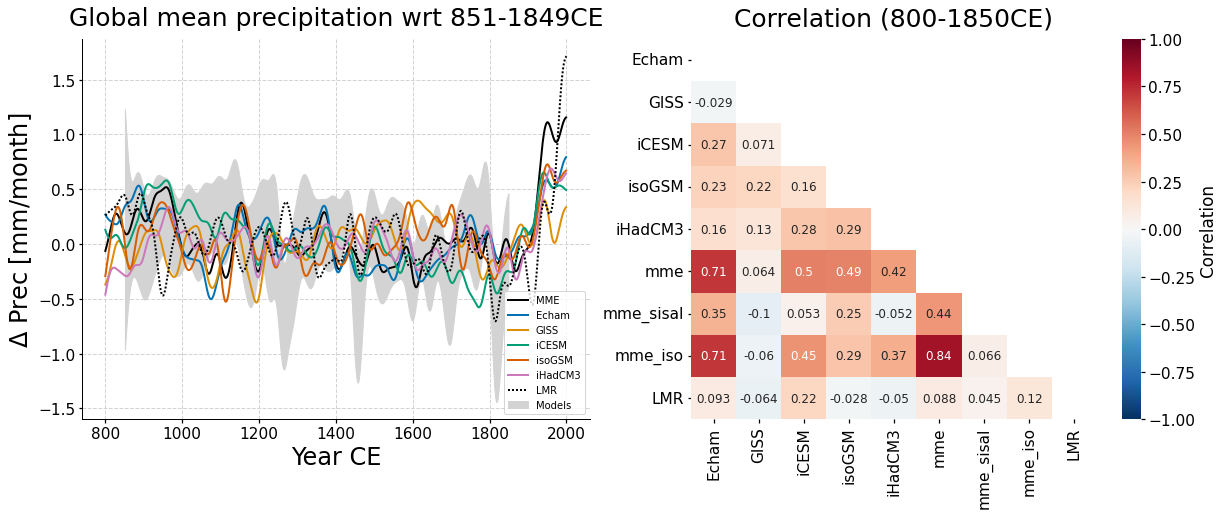

In [1387]:
##### JOINT CORRELATION TABLE AND CURVES

figsize=(20,7)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=figsize)
#plt.suptitle('Global mean precipitation wrt 851-1849CE',fontsize=30,y=1.02)

label='$\Delta$ Prec [mm/month]'
validation={'LMR':lmr_prec}
cutoff=1/50
start_a='0851'
end_a='1849'
prior=[data.time.values,mean_prec,std_prec]
var='gm_prec'

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
mode='both' #sisal, iso
models=['mme_nogiss','Echam','GISS','iCESM','isoGSM','iHadCM3']
start='0800'
end='2000'
#if using prior, change start_a and end_a to 851-1849
title='Global mean precipitation wrt 851-1849CE'
ticks=np.arange(0,1400,200)
labels=list(map(str,np.arange(800,2200,200)))
legend=True
lw=2

#fig=plt.figure(figsize=(12,8))
colors=np.concatenate([[(0,0,0)],sns.color_palette('colorblind',n_colors=(len(models)+len(list(validation.keys()))-2)),[(0,0,0)]])

ax=axes[0]

for i,m in enumerate(models):
    path=basepath+m+'_'+mode+'.nc'
    p=xr.open_dataset(path)[var]
    if cutoff is not None:
        ts=quick_filt(anomaly(p,start_a,end_a).values,cutoff=cutoff)
    else:
        ts=anomaly(p,start_a,end_a).values
    if m=='mme_nogiss':
        m='MME'
    #plt.plot(p.time,ts,label=m,lw=2,color=colors[i])
    ax.plot(ts,label=m,lw=2,color=colors[i])

for j,(n,v) in enumerate(validation.items()):
    data=v.sel(time=slice(start,end))
    if cutoff is not None:
        ts=quick_filt(anomaly(data,start_a,end_a).values,cutoff=cutoff)
    else:
        ts=anomaly(data,start_a,end_a).values
    #plt.plot(data.time,ts,label=n,lw=2,color=colors[i+j+1],ls=(0, (1, 1)))
    ax.plot(ts,label=n,lw=2,color=colors[i+j+1],ls=(0, (1, 1)))
    #time=data.time

if prior is not None:
    if cutoff is not None:
        prior[1]=quick_filt((prior[1]),cutoff=cutoff)
        prior[2]=quick_filt(prior[2],cutoff=cutoff)
    #plt.fill_between(prior[0],prior[1]-prior[2], prior[1]+prior[2],color='lightgrey',label='Priors')
    ax.fill_between(np.arange(51,51+999),prior[1]-prior[2], prior[1]+prior[2],color='lightgrey',label='Models')

#ax.set_yticks(fontsize=20)
ax.grid('On')
#plt.xticks(ticks=ticks,labels=labels,fontsize=20)
ax.set_ylabel(label,fontsize=24)
ax.set_xlabel('Year CE',fontsize=24)
#labels=np.arange(800,2200,200)
labels=np.arange(600,2200,200)
#ax=plt.gca()
ax.set_xticklabels(labels)
#plt.tick_params(axis='both', which='major', labelsize=22)

if legend is True:
    #plt.legend(fontsize=18,bbox_to_anchor=(1.01, 1),frameon=True)
    ax.legend(fontsize=10,loc='lower right',frameon=True)
if title is not None:
    ax.set_title(title,fontsize=25,y=1.02)

    
#lmr_prec2=utils.globalmean(lmr_prec.sel(time=slice('0800','1850')))
lmr_prec2=lmr_prec.sel(time=slice('0800','1850'))
#lmr_prec2=utils.globalmean(lmr_prec.sel(time=slice('0800','1850')))

##VON 800-1850. 30 YEAR BUTTERWORTH FILTER

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

start='0800'
#start='1850'
#end='2000'
end='1850'

#anomaly times
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/50
cutoff=None
dic={}

########
def load_a_f(path,var='gm_prec',start_a='1850',end_a='1900',qf=True):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values
########


if cutoff is None:
    for m in models:
        data2=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data2
        else:
            dic[m]=data2

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    #dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_prec2,start=start,end=end).values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data2=load_a_f((basepath+m+'_both.nc'),qf=True)
        if m=='mme_nogiss':
            dic['mme']=data2
        else:
            dic[m]=data2

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=True)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=True)

    #dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_prec2.values,cutoff)
    df=pd.DataFrame(dic)

#fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cbar_kws = {'orientation':'vertical', 'aspect':20,'label':'Correlation'}
sns.heatmap(corr_matrix,mask=mask, annot=True,vmax=1,vmin=-1,cmap='RdBu_r',cbar_kws=cbar_kws,ax=axes[1],annot_kws={"size":12})
#plt.title('Correlation heat map for global mean precipitation (800-1850)',fontsize=23)
axes[1].set_title('Correlation (800-1850CE)',fontsize=25,y=1.02)
plt.show()    
    
    

In [1389]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/gm_prec.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

<AxesSubplot:title={'center':'Correlation (800-1850CE)'}>

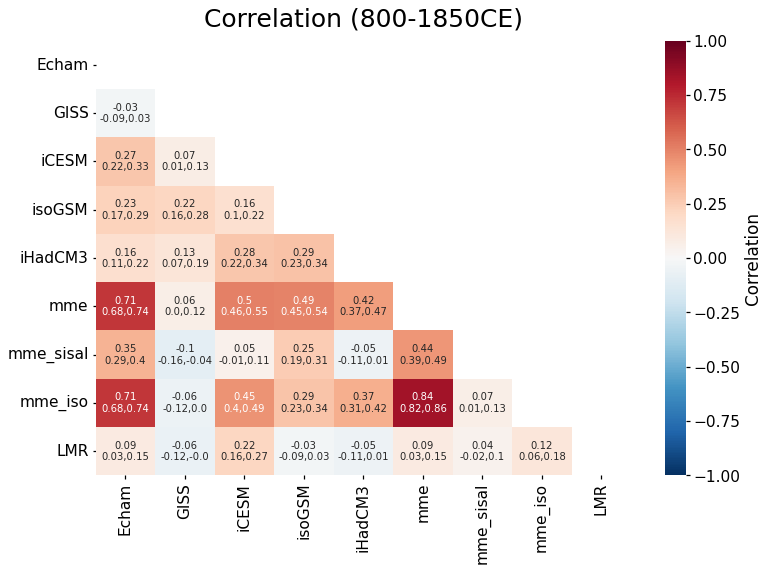

In [1415]:
#confidence interval heatmap

plt.figure(figsize=(12,8))
plt.title('Correlation (800-1850CE)',fontsize=25,y=1.02)
    

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

start='0800'
#start='1850'
#end='2000'
end='1850'

#anomaly times
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/50
cutoff=None
dic={}

########
def load_a_f(path,var='gm_prec',start_a='1850',end_a='1900',qf=True):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values
########


if cutoff is None:
    for m in models:
        data2=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data2
        else:
            dic[m]=data2

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    #dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_prec2,start=start,end=end).values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data2=load_a_f((basepath+m+'_both.nc'),qf=True)
        if m=='mme_nogiss':
            dic['mme']=data2
        else:
            dic[m]=data2

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=True)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=True)

    #dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_prec2.values,cutoff)
    df=pd.DataFrame(dic)

#fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cols=[col for col in df.columns]
empty=np.empty((len(cols),len(cols)),dtype=object)
for i,c1 in enumerate(cols):
    for j,c2 in enumerate(cols):
        _,_,lo,hi=pearsonr_ci(df[c1],df[c2])
        #empty[i,j]=('('+str(np.round(lo,2))+','+str(np.round(hi,2))+')')
        
        empty[i,j]=str(np.round(corr_matrix.to_numpy()[i,j],2))+'\n'+str(np.round(lo,2))+','+str(np.round(hi,2))

#sns.heatmap(corr_matrix, mask=mask,annot=True,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[1],cbar=False)
#sns.heatmap(corr_matrix, mask=mask,annot=empty,vmax=1,vmin=-1,cmap='RdBu_r',cbar=Fa, fmt = '',annot_kws={'fontsize':10})
sns.heatmap(corr_matrix,mask=mask, annot=empty,vmax=1,vmin=-1,cmap='RdBu_r',fmt = '',cbar_kws=cbar_kws,annot_kws={"size":10})
#plt.title('Correlation Heat map for global mean temperature (1850-1990)',fontsize=25)

In [1416]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/gm_prec_ci.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

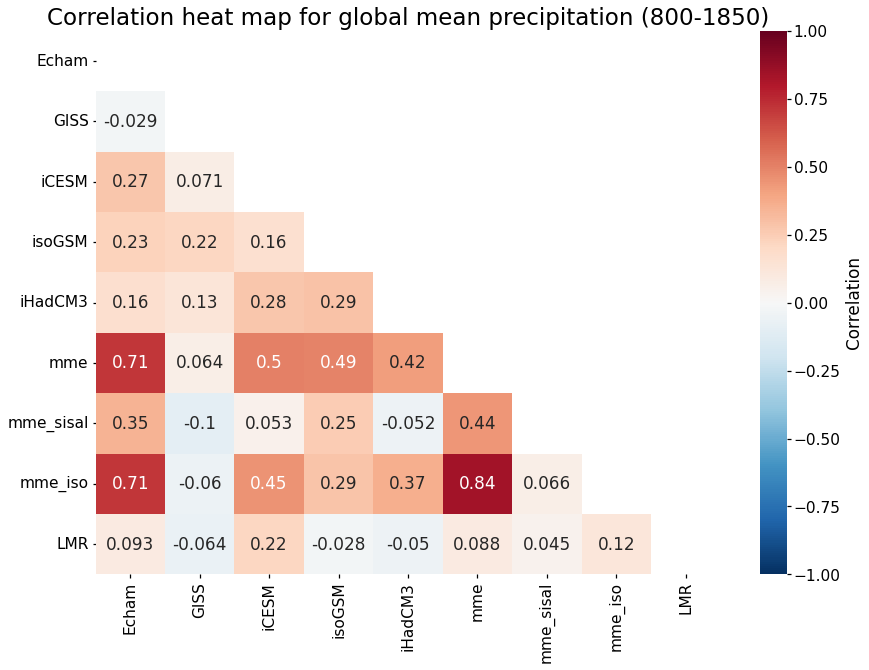

In [803]:
lmr_prec2=utils.globalmean(lmr_prec.sel(time=slice('0800','1850')))
#lmr_prec2=utils.globalmean(lmr_prec.sel(time=slice('0800','1850')))

##VON 800-1850. 30 YEAR BUTTERWORTH FILTER

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

start='0800'
#start='1850'
#end='2000'
end='1850'

#anomaly times
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/50
cutoff=None
dic={}

########
def load_a_f(path,var='gm_prec',start_a='1850',end_a='1900',qf=True):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values
########


if cutoff is None:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    #dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_prec2,start=start,end=end).values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=True)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=True)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=True)

    #dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_prec2.values,cutoff)
    df=pd.DataFrame(dic)

fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cbar_kws = {'orientation':'vertical', 'aspect':20,'label':'Correlation'}
sns.heatmap(corr_matrix,mask=mask, annot=True,vmax=1,vmin=-1,cmap='RdBu_r',cbar_kws=cbar_kws)
plt.title('Correlation heat map for global mean precipitation (800-1850)',fontsize=23)
plt.show()

In [ ]:
# precipitation plots and correlation table




In [799]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/prec_corr.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

# Correlation tables:
- option: time slice (800-1850,1850-2000), models (maybe only mme, mme sisal and iso, phyda, lmr, all five single models)

- https://stackoverflow.com/questions/39409866/correlation-heatmap
- requires a dataframe (check 5_4_mme to see how I did it there)

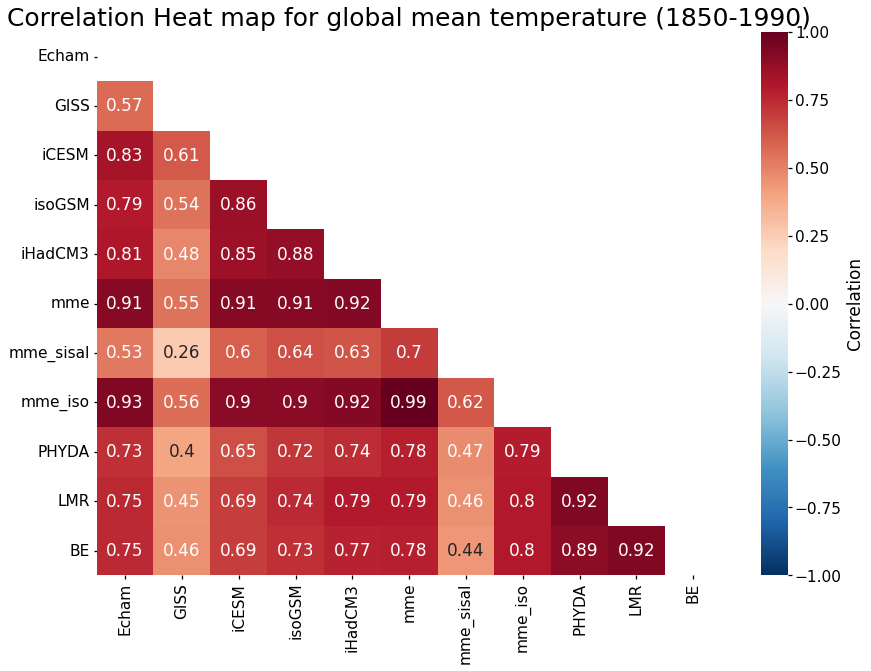

In [721]:
##VON 1850 - 2000, UNFILTERED

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

#start='0800'
start='1850'
end='2000'
#end='1999'
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/30
cutoff=None
dic={}

########
def load_a_f(path,var='gm_tsurf',start_a='1850',end_a='1900',qf=True):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values
########


if cutoff is None:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_mean.sel(time=slice(start,end)),start=start,end=end).values
    
    dic['BE']=BE_mean[:150].values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=True)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=True)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=True)

    dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_mean.sel(time=slice(start,end)).values,cutoff)
    dic['BE']=quick_filt(BE_mean[:150],cutoff)
    df=pd.DataFrame(dic)

fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cbar_kws = {'orientation':'vertical', 'aspect':20,'label':'Correlation'}
sns.heatmap(corr_matrix, mask=mask,annot=True,vmax=1,vmin=-1,cmap='RdBu_r',cbar_kws=cbar_kws)
plt.title('Correlation Heat map for global mean temperature (1850-1990)',fontsize=25)
plt.show()


In [722]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/heatmap_warming.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

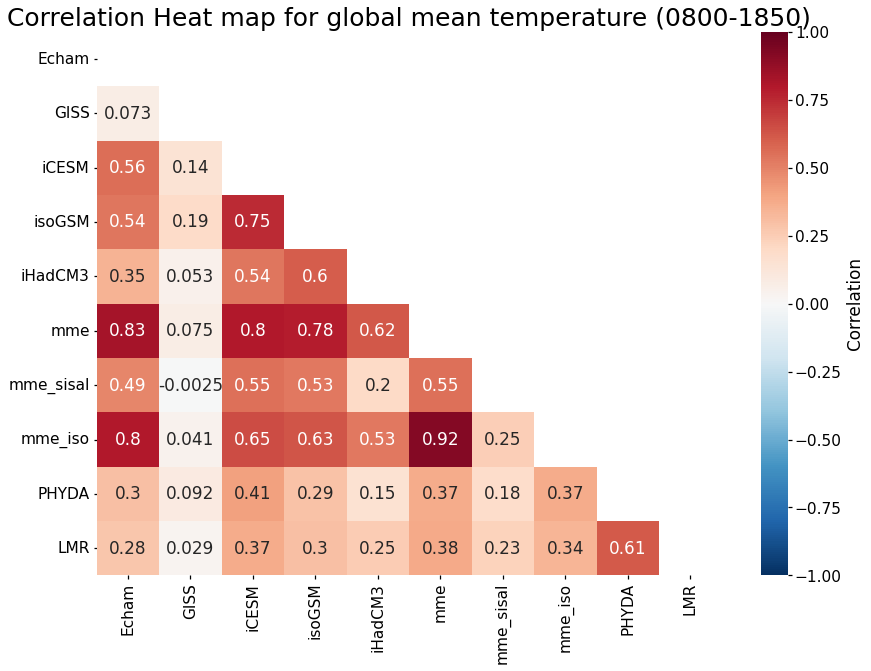

In [861]:
##VON 800-1850. 50 YEAR BUTTERWORTH FILTER

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

start='0800'
#start='1850'
#end='2000'
end='1850'

#anomaly times
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/50
cutoff=None
dic={}

########
def load_a_f(path,var='gm_tsurf',start_a='1850',end_a='1900',qf=True):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values
########


if cutoff is None:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_mean.sel(time=slice(start,end)),start=start,end=end).values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=True)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=True)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=True)

    dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_mean.sel(time=slice(start,end)).values,cutoff)
    df=pd.DataFrame(dic)

fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#cbar_kws = {'orientation':'vertical', 'aspect':20,'label':'Correlation'}
sns.heatmap(corr_matrix, mask=mask,annot=True,vmax=1,vmin=-1,cmap='RdBu_r')




plt.title('Correlation Heat map for global mean temperature (0800-1850)',fontsize=25)
plt.show()


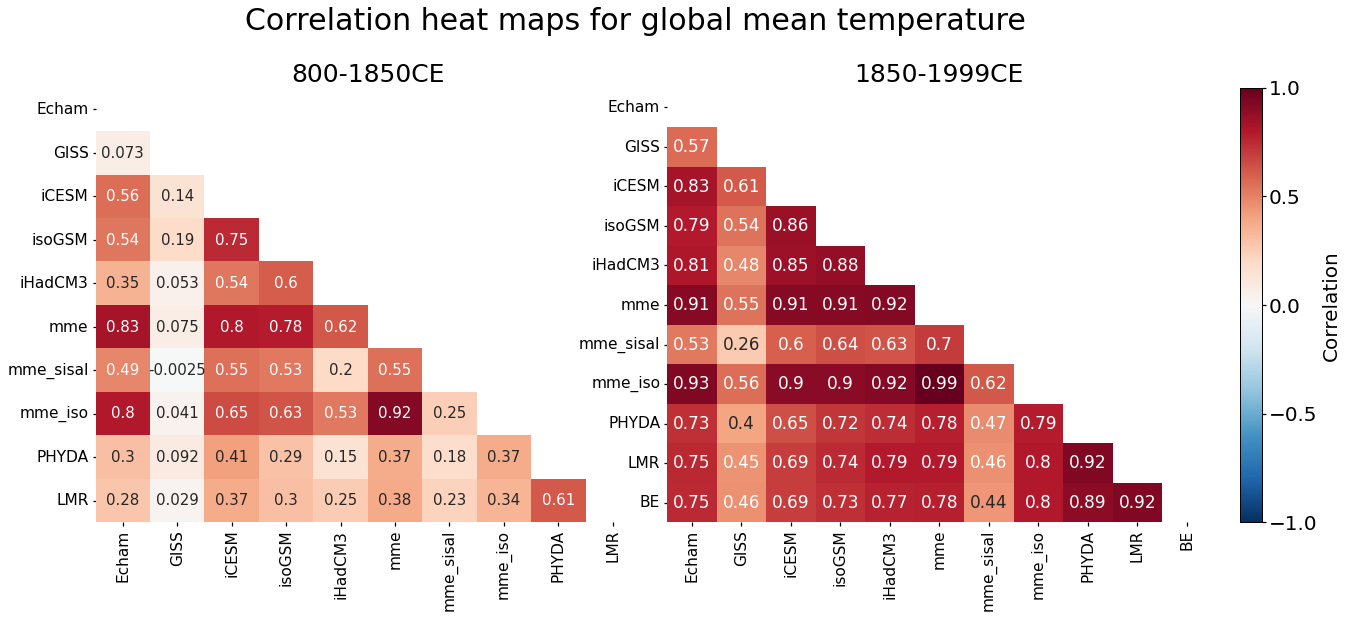

In [1401]:
#BOTH CORRELATION TABLES WITH JOINED

##VON 1850 - 2000, UNFILTERED

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

#start='0800'
start='1850'
end='2000'
#end='1999'
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/30
cutoff=None
dic={}

########
def load_a_f(path,var='gm_tsurf',start_a='1850',end_a='1900',qf=True):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values
########
figsize=(20,8)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=figsize)
#fig.box(on=None)
#plt.suptitle('Local correlation of MME and LMR',fontsize=30,y=0.83)

if cutoff is None:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_mean.sel(time=slice(start,end)),start=start,end=end).values
    
    dic['BE']=BE_mean[:150].values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=True)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=True)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=True)

    dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_mean.sel(time=slice(start,end)).values,cutoff)
    dic['BE']=quick_filt(BE_mean[:150],cutoff)
    df=pd.DataFrame(dic)

#fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask,annot=True,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[1],cbar=False)
#sns.heatmap(corr_matrix, mask=mask,annot=empty,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[1],cbar=False, fmt = '',annot_kws={'fontsize':10})
#plt.title('Correlation Heat map for global mean temperature (1850-1990)',fontsize=25)

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

start='0800'
#start='1850'
#end='2000'
end='1850'

#anomaly times
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/50
cutoff=None
#cutoff=None
dic={}

def load_a_f2(path,var='gm_tsurf',start_a='1850',end_a='1900',qf=True,cutoff=cutoff):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values

if cutoff is None:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_mean.sel(time=slice(start,end)),start=start,end=end).values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data=load_a_f2((basepath+m+'_both.nc'),qf=True,cutoff=cutoff)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f2(str(basepath+'mme_nogiss_sisal.nc'),qf=True,cutoff=cutoff)
    dic['mme_iso']=load_a_f2(str(basepath+'mme_nogiss_iso.nc'),qf=True,cutoff=cutoff)

    dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_mean.sel(time=slice(start,end)).values,cutoff)
    df=pd.DataFrame(dic)

#fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#cbar_kws = {'orientation':'vertical', 'aspect':20,'label':'Correlation'}
sns.heatmap(corr_matrix, mask=mask,annot=True,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[0],cbar=False,annot_kws={'fontsize':15})
#plt.tight_layout()

axes[0].set_title('800-1850CE',fontsize=25)
axes[1].set_title('1850-1999CE',fontsize=25)

p0=axes[-1].get_position().get_points().flatten()
from matplotlib import ticker

ax_cbar1 = fig.add_axes([p0[2]+0.02, p0[1], 0.015, p0[3]-p0[1]])
cb=fig.colorbar(p,cax=ax_cbar1, orientation='vertical',cmap=cmap)
cb.ax.tick_params(labelsize=20)
tick_locator = ticker.MaxNLocator(nbins=4)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Correlation',fontsize=20)

#plt.suptitle(fontsize=)
plt.subplots_adjust(wspace=0.05)

plt.suptitle('Correlation heat maps for global mean temperature',fontsize=30,y=1.02)
plt.show()



In [1399]:
p=corr.plot(ax=ax,vmin=-1,vmax=1,add_colorbar=False,cmap=cmap)

In [1402]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/heatmap_joint.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

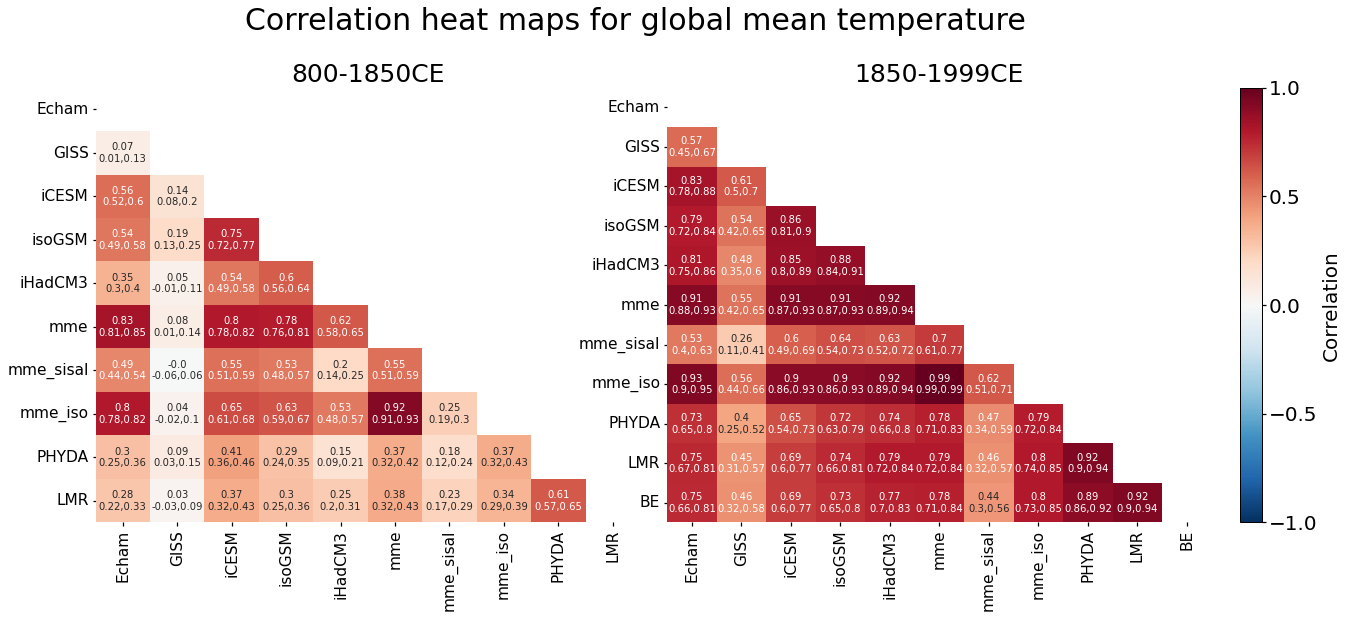

In [1403]:
#BOTH CORRELATION TABLES with confidence intervals

##VON 1850 - 2000, UNFILTERED

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

#start='0800'
start='1850'
end='2000'
#end='1999'
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/30
cutoff=None
dic={}

########
def load_a_f(path,var='gm_tsurf',start_a='1850',end_a='1900',qf=True):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values
########
figsize=(20,8)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=figsize)
#fig.box(on=None)
#plt.suptitle('Local correlation of MME and LMR',fontsize=30,y=0.83)

if cutoff is None:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_mean.sel(time=slice(start,end)),start=start,end=end).values
    
    dic['BE']=BE_mean[:150].values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=True)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=True)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=True)

    dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_mean.sel(time=slice(start,end)).values,cutoff)
    dic['BE']=quick_filt(BE_mean[:150],cutoff)
    df=pd.DataFrame(dic)

#fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cols=[col for col in df.columns]
empty=np.empty((len(cols),len(cols)),dtype=object)
for i,c1 in enumerate(cols):
    for j,c2 in enumerate(cols):
        _,_,lo,hi=pearsonr_ci(df[c1],df[c2])
        #empty[i,j]=('('+str(np.round(lo,2))+','+str(np.round(hi,2))+')')
        
        empty[i,j]=str(np.round(corr_matrix.to_numpy()[i,j],2))+'\n'+str(np.round(lo,2))+','+str(np.round(hi,2))

#sns.heatmap(corr_matrix, mask=mask,annot=True,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[1],cbar=False)
sns.heatmap(corr_matrix, mask=mask,annot=empty,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[1],cbar=False, fmt = '',annot_kws={'fontsize':10})
#plt.title('Correlation Heat map for global mean temperature (1850-1990)',fontsize=25)

basepath='/home/mchoblet/paleoda/results/experiments/thesis_6_1_0/'
models=['Echam','GISS','iCESM','isoGSM','iHadCM3','mme_nogiss']

start='0800'
#start='1850'
#end='2000'
end='1850'

#anomaly times
start_a='1850'
end_a='1900'

#cutoff=1/30
#cutoff=1/50
cutoff=None
dic={}

def load_a_f2(path,var='gm_tsurf',start_a='1850',end_a='1900',qf=True,cutoff=cutoff):
    data=xr.open_dataset(path)[var].sel(time=slice(start,end))
    data=anomaly(data,start=start_a,end=end_a)
    if qf:
        return quick_filt(data,cutoff)
    else:
        return data.values

if cutoff is None:
    for m in models:
        data=load_a_f((basepath+m+'_both.nc'),qf=False)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f(str(basepath+'mme_nogiss_sisal.nc'),qf=False)
    dic['mme_iso']=load_a_f(str(basepath+'mme_nogiss_iso.nc'),qf=False)

    dic['PHYDA']=anomaly(phyda['gmt_mn'].sel(time=slice(start,end)),start=start_a,end=end_a).values
    dic['LMR']=anomaly(lmr_mean.sel(time=slice(start,end)),start=start,end=end).values
    
    df=pd.DataFrame(dic)
else:
    for m in models:
        data=load_a_f2((basepath+m+'_both.nc'),qf=True,cutoff=cutoff)
        if m=='mme_nogiss':
            dic['mme']=data
        else:
            dic[m]=data

    dic['mme_sisal']=load_a_f2(str(basepath+'mme_nogiss_sisal.nc'),qf=True,cutoff=cutoff)
    dic['mme_iso']=load_a_f2(str(basepath+'mme_nogiss_iso.nc'),qf=True,cutoff=cutoff)

    dic['PHYDA']=quick_filt(phyda['gmt_mn'].sel(time=slice(start,end)).values,cutoff)
    dic['LMR']=quick_filt(lmr_mean.sel(time=slice(start,end)).values,cutoff)
    df=pd.DataFrame(dic)

#fig=plt.figure(figsize=(14,10))
corr_matrix = df.corr()

cols=[col for col in df.columns]
empty=np.empty((len(cols),len(cols)),dtype=object)
for i,c1 in enumerate(cols):
    for j,c2 in enumerate(cols):
        _,_,lo,hi=pearsonr_ci(df[c1],df[c2])
        #empty[i,j]=('('+str(np.round(lo,2))+','+str(np.round(hi,2))+')')
        empty[i,j]=str(np.round(corr_matrix.to_numpy()[i,j],2))+'\n'+str(np.round(lo,2))+','+str(np.round(hi,2))


mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#cbar_kws = {'orientation':'vertical', 'aspect':20,'label':'Correlation'}
#sns.heatmap(corr_matrix, mask=mask,annot=True,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[0],cbar=False,annot_kws={'fontsize':15})
sns.heatmap(corr_matrix, mask=mask,annot=empty,vmax=1,vmin=-1,cmap='RdBu_r',ax=axes[0],cbar=False, fmt = '',annot_kws={'fontsize':10})
#plt.tight_layout()

axes[0].set_title('800-1850CE',fontsize=25)
axes[1].set_title('1850-1999CE',fontsize=25)

p0=axes[-1].get_position().get_points().flatten()
from matplotlib import ticker

ax_cbar1 = fig.add_axes([p0[2]+0.02, p0[1], 0.015, p0[3]-p0[1]])

cb=fig.colorbar(p, cax=ax_cbar1, orientation='vertical',cmap=cmap)
cb.ax.tick_params(labelsize=20)
tick_locator = ticker.MaxNLocator(nbins=4)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('Correlation',fontsize=20)

#plt.suptitle(fontsize=)
plt.subplots_adjust(wspace=0.05)

plt.suptitle('Correlation heat maps for global mean temperature',fontsize=30,y=1.02)
plt.show()

In [1404]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/heatmap_joint_ci.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )

In [1280]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
      
    Source: https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(len(x)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [1284]:
cols=[col for col in df.columns]

In [1306]:
empty=np.empty((len(cols),len(cols)),dtype=object)
for i,c1 in enumerate(cols):
    for j,c2 in enumerate(cols):
        _,_,lo,hi=pearsonr_ci(df[c1],df[c2])
        empty[i,j]=('('+str(np.round(lo,2))+','+str(np.round(hi,2))+')')

In [1307]:
empty

array([['(1.0,1.0)', '(-0.2,-0.08)', '(0.55,0.63)', '(0.56,0.64)',
        '(0.31,0.42)', '(0.87,0.89)', '(0.53,0.61)', '(0.82,0.85)',
        '(0.35,0.45)', '(0.4,0.49)'],
       ['(-0.2,-0.08)', '(1.0,1.0)', '(-0.08,0.05)', '(0.04,0.16)',
        '(-0.14,-0.02)', '(-0.16,-0.04)', '(-0.12,0.0)', '(-0.2,-0.08)',
        '(-0.01,0.11)', '(-0.1,0.02)'],
       ['(0.55,0.63)', '(-0.08,0.05)', '(1.0,1.0)', '(0.83,0.86)',
        '(0.61,0.68)', '(0.81,0.85)', '(0.58,0.66)', '(0.62,0.69)',
        '(0.46,0.55)', '(0.41,0.51)'],
       ['(0.56,0.64)', '(0.04,0.16)', '(0.83,0.86)', '(1.0,1.0)',
        '(0.56,0.64)', '(0.8,0.84)', '(0.56,0.64)', '(0.6,0.67)',
        '(0.41,0.5)', '(0.39,0.49)'],
       ['(0.31,0.42)', '(-0.14,-0.02)', '(0.61,0.68)', '(0.56,0.64)',
        '(1.0,1.0)', '(0.58,0.65)', '(0.16,0.27)', '(0.47,0.56)',
        '(0.09,0.21)', '(0.28,0.39)'],
       ['(0.87,0.89)', '(-0.16,-0.04)', '(0.81,0.85)', '(0.8,0.84)',
        '(0.58,0.65)', '(1.0,1.0)', '(0.58,0.65)', '(0.9,0

In [1292]:
a

(0.9999999999999998, 0.0, 0.9999999999999998, 0.9999999999999998)

In [ ]:
empty[i,j]=

In [720]:
fig.savefig('/home/mchoblet/plots_thesis/6_1/heatmap_lm.pdf', dpi='figure', format='pdf', metadata=None,
        bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None,
       )